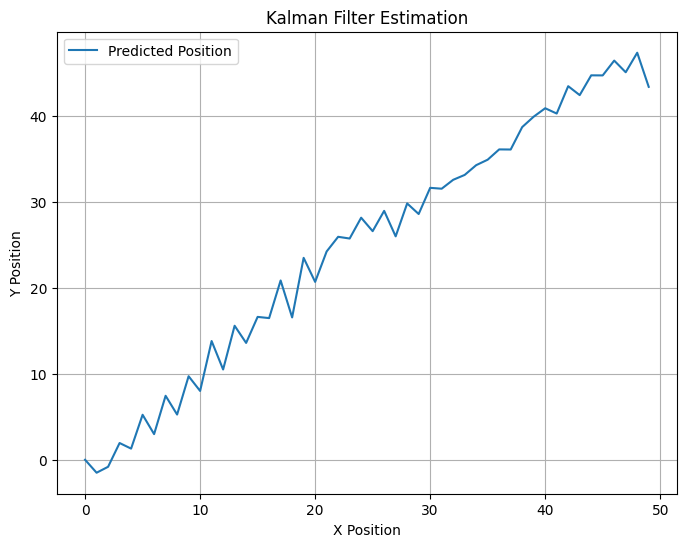

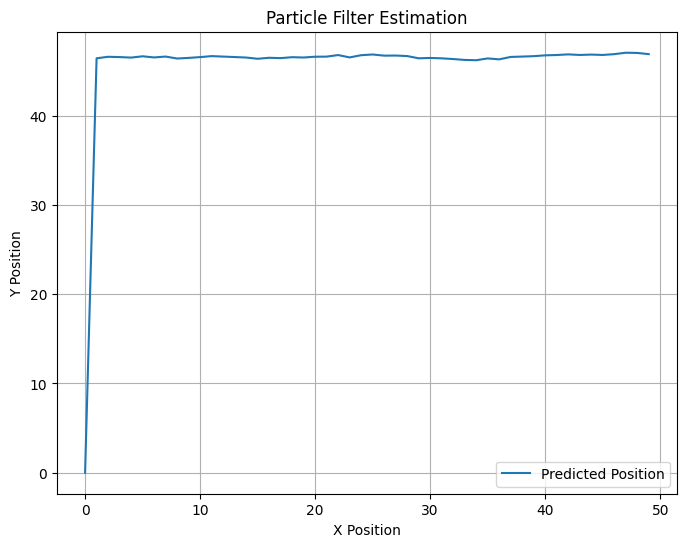

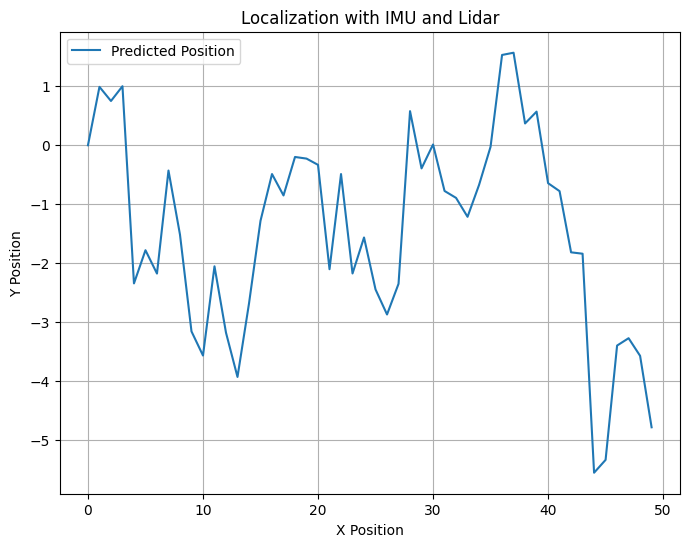

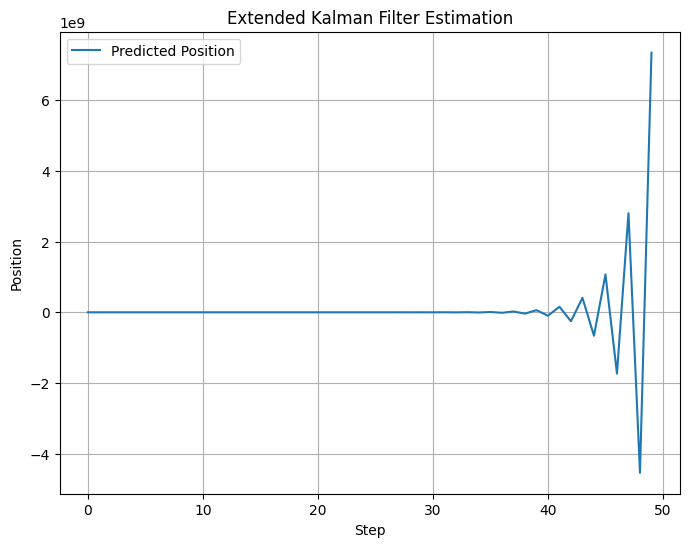

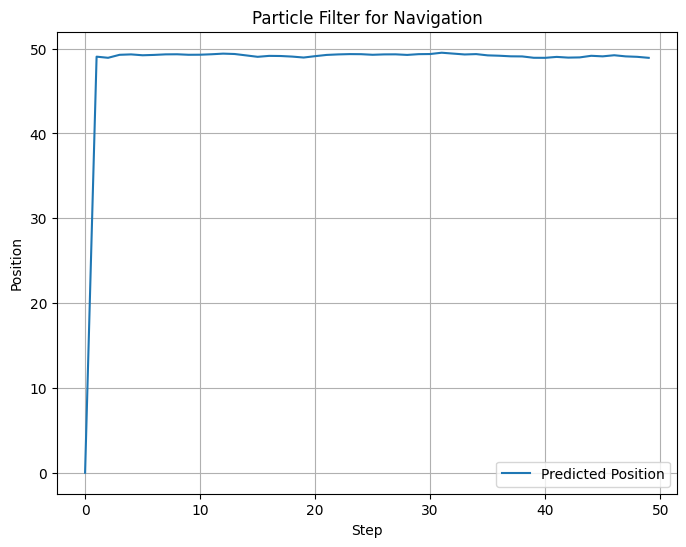

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan hasil simulasi
def display_image(title, x_data, y_data):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.plot(x_data, y_data, label="Predicted Position")
    plt.xlabel('X Position')
    plt.ylabel('Y Position')
    plt.grid(True)
    plt.legend()
    plt.show()

# Filter Kalman Implementation
def kalman_filter(steps=50):
    # Inisialisasi variabel
    x = np.zeros((steps, 2))  # Posisi [x, y]
    x_est = np.zeros((steps, 2))  # Estimasi posisi
    P = np.eye(2)  # Kovarians
    R = 0.1  # Noise sensor
    Q = 0.1  # Noise sistem
    F = np.array([[1, 0], [0, 1]])  # Matriks transisi
    H = np.array([[1, 0], [0, 1]])  # Matriks observasi

    # Initial guess
    x[0] = [0, 0]
    x_est[0] = [0, 0]

    for i in range(1, steps):
        # Prediksi posisi
        x[i] = x[i-1] + np.random.normal(0, 1, 2)

        # Update prediksi posisi dengan filter Kalman
        x_est[i] = np.dot(F, x_est[i-1])
        P = np.dot(F, np.dot(P, F.T)) + Q
        K = np.dot(P, H.T) / (np.dot(H, np.dot(P, H.T)) + R)
        x_est[i] = x_est[i] + np.dot(K, (x[i] - np.dot(H, x_est[i])))
        P = np.dot(np.eye(2) - np.dot(K, H), P)

    # Visualisasi hasil estimasi
    display_image("Kalman Filter Estimation", np.arange(steps), x_est[:, 0])

# Panggil fungsi Kalman Filter
kalman_filter(50)


def particle_filter(steps=50, num_particles=100):
    # Inisialisasi variabel
    x_true = np.zeros(steps)  # Posisi sebenarnya
    x_est = np.zeros(steps)  # Estimasi posisi
    particles = np.random.rand(num_particles) * 100  # Partikel awal

    for i in range(1, steps):
        # Update posisi sebenarnya dengan noise
        x_true[i] = x_true[i-1] + np.random.normal(0, 1)

        # Gerakkan partikel dengan noise
        particles += np.random.normal(0, 1, num_particles)

        # Update estimasi posisi dengan rata-rata partikel
        x_est[i] = np.mean(particles)

    # Visualisasi hasil estimasi
    display_image("Particle Filter Estimation", np.arange(steps), x_est)

# Panggil fungsi Particle Filter
particle_filter(50)


def localization_with_sensors(steps=50):
    # Inisialisasi variabel
    x_true = np.zeros(steps)  # Posisi sebenarnya
    x_est = np.zeros(steps)  # Estimasi posisi dari sensor
    imu_noise = 0.5  # Noise IMU
    lidar_noise = 1  # Noise Lidar

    for i in range(1, steps):
        # Update posisi sebenarnya dengan noise
        x_true[i] = x_true[i-1] + np.random.normal(0, 1)

        # Simulasi pembacaan sensor IMU dan Lidar
        imu_reading = x_true[i] + np.random.normal(0, imu_noise)
        lidar_reading = x_true[i] + np.random.normal(0, lidar_noise)

        # Estimasi posisi dengan rata-rata sensor
        x_est[i] = (imu_reading + lidar_reading) / 2

    # Visualisasi hasil estimasi
    display_image("Localization with IMU and Lidar", np.arange(steps), x_est)

# Panggil fungsi Localization with Sensors
localization_with_sensors(50)


import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan hasil simulasi
def display_image(title, x_data, y_data):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.plot(x_data, y_data, label="Predicted Position")
    plt.xlabel('Step')
    plt.ylabel('Position')
    plt.grid(True)
    plt.legend()
    plt.show()

# Implementasi Extended Kalman Filter
def extended_kalman_filter(steps=50):
    # Inisialisasi variabel
    x_true = np.zeros(steps)  # Posisi sebenarnya
    x_est = np.zeros((steps, 2))   # Estimasi posisi, array 2D untuk [x, y]
    P = np.eye(2)  # Kovarians
    R = 0.1  # Noise sensor
    Q = 0.1  # Noise sistem
    F = np.array([[1, 1], [0, 1]])  # Matriks transisi
    H = np.array([[1, 0], [0, 1]])  # Matriks observasi

    # Estimasi posisi awal (x=0, y=0)
    x_est[0] = np.array([0, 0])

    for i in range(1, steps):
        # Update posisi sebenarnya dengan noise
        x_true[i] = x_true[i-1] + np.random.normal(0, 1)

        # Update prediksi posisi dengan EKF
        x_pred = np.dot(F, x_est[i-1])  # Prediksi posisi
        P = np.dot(F, np.dot(P, F.T)) + Q  # Update kovarians
        K = np.dot(P, H.T) / (np.dot(H, np.dot(P, H.T)) + R)  # Gain Kalman
        x_est[i] = x_pred + np.dot(K, (x_true[i] - np.dot(H, x_pred)))  # Estimasi posisi baru
        P = np.dot(np.eye(2) - np.dot(K, H), P)  # Update kovarians

    # Visualisasi hasil estimasi
    display_image("Extended Kalman Filter Estimation", np.arange(steps), x_est[:, 0])  # Menampilkan estimasi posisi x

# Panggil fungsi Extended Kalman Filter
extended_kalman_filter(50)


def particle_filter_navigation(steps=50, num_particles=100):
    x_true = np.zeros(steps)  # Posisi sebenarnya
    x_est = np.zeros(steps)  # Estimasi posisi
    particles = np.random.rand(num_particles) * 100  # Partikel awal

    for i in range(1, steps):
        # Update posisi sebenarnya
        x_true[i] = x_true[i-1] + np.random.normal(0, 1)

        # Update partikel dengan noise
        particles += np.random.normal(0, 1, num_particles)

        # Update estimasi posisi dengan rata-rata partikel
        x_est[i] = np.mean(particles)

    # Visualisasi hasil estimasi
    display_image("Particle Filter for Navigation", np.arange(steps), x_est)

# Panggil fungsi Particle Filter for Navigation
particle_filter_navigation(50)